# Numerical Walk-through of Self-Attention and Multi-Head Attention
This notebook demonstrates the exact numeric transformations used in the `Attention Is All You Need` paper, using small matrices for clarity.

## 1. Setup: Input Embeddings

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:

import numpy as np
np.set_printoptions(precision=2, suppress=True)

# Tokens: ["I", "love", "math"]
X = np.array([
    [1, 0],
    [0, 1],
    [1, 1]
])

print("Input embeddings X:")
print(X)


Input embeddings X:
[[1 0]
 [0 1]
 [1 1]]


## 2. Define Projection Matrices

In [20]:

W_Q = np.array([[1, 0],
                [0, 1]])

W_K = np.array([[1, 1],
                [0, 1]])

W_V = np.array([[1, 0],
                [1, 1]])

print("W_Q:\n", W_Q)
print("W_K:\n", W_K)
print("W_V:\n", W_V)


W_Q:
 [[1 0]
 [0 1]]
W_K:
 [[1 1]
 [0 1]]
W_V:
 [[1 0]
 [1 1]]


## 3. Compute Queries, Keys, and Values

In [21]:
## 3 X 2  @ 2 X 2 => 3 X 2

In [22]:

Q = X @ W_Q
K = X @ W_K
V = X @ W_V

print("Q:\n", Q)
print("K:\n", K)
print("V:\n", V)


Q:
 [[1 0]
 [0 1]
 [1 1]]
K:
 [[1 1]
 [0 1]
 [1 2]]
V:
 [[1 0]
 [1 1]
 [2 1]]


## 4. Compute Scaled Dot-Product Attention

In [29]:
K.T.shape

(2, 3)

In [27]:
K.T

array([[1, 0, 1],
       [1, 1, 2]])

In [31]:

d_k = Q.shape[1]
scores = Q @ K.T
scaled_scores = scores / np.sqrt(d_k)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

A = softmax(scaled_scores)

print("Raw scores QK^T:\n", scores)
print("Scaled scores:\n", scaled_scores)
print("Attention matrix A:\n", A)


Raw scores QK^T:
 [[1 0 1]
 [1 1 2]
 [2 1 3]]
Scaled scores:
 [[0.71 0.   0.71]
 [0.71 0.71 1.41]
 [1.41 0.71 2.12]]
Attention matrix A:
 [[0.4  0.2  0.4 ]
 [0.25 0.25 0.5 ]
 [0.28 0.14 0.58]]


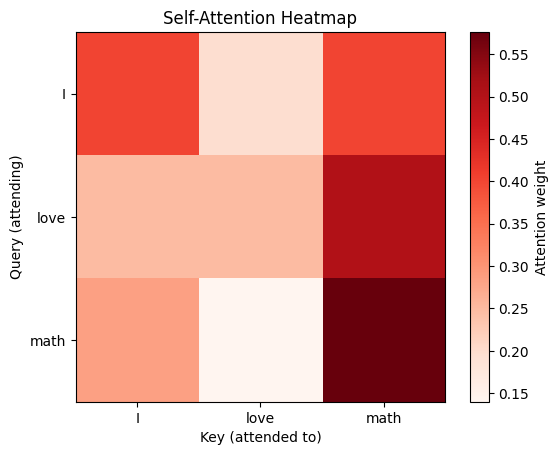

In [32]:


tokens = ["I", "love", "math"]

plt.figure()
plt.imshow(A, cmap="Reds")
plt.xticks(range(len(tokens)), tokens)
plt.yticks(range(len(tokens)), tokens)
plt.xlabel("Key (attended to)")
plt.ylabel("Query (attending)")
plt.title("Self-Attention Heatmap")
plt.colorbar(label="Attention weight")
plt.show()


## 5. Compute Output Vectors

In [33]:

output = A @ V
print("Output vectors (contextualized embeddings):")
print(output)


Output vectors (contextualized embeddings):
[[1.4  0.6 ]
 [1.5  0.75]
 [1.58 0.72]]


## 6. Multi-Head Attention Example (2 Heads)

In [37]:

# Expand embeddings to 4D
X4 = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 1, 1, 1]
])

# Head 1 projections (first 2 dims)
W1 = np.array([
    [1, 0],
    [0, 1],
    [0, 0],
    [0, 0]
])

# Head 2 projections (last 2 dims)
W2 = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [0, 1]
])

def attention_head(X, W):
    Q = X @ W
    K = X @ W
    V = X @ W
    scores = Q @ K.T / np.sqrt(Q.shape[1])
    A = softmax(scores)
    O = A @ V
    return A, O

A1, O1 = attention_head(X4, W1)
A2, O2 = attention_head(X4, W2)

print("Head 1 Attention:\n", A1)
print("Head 1 Output:\n", O1)
print("Head 2 Attention:\n", A2)
print("Head 2 Output:\n", O2)


Head 1 Attention:
 [[0.4  0.2  0.4 ]
 [0.2  0.4  0.4 ]
 [0.25 0.25 0.5 ]]
Head 1 Output:
 [[0.8  0.6 ]
 [0.6  0.8 ]
 [0.75 0.75]]
Head 2 Attention:
 [[0.4  0.2  0.4 ]
 [0.03 0.49 0.49]
 [0.04 0.32 0.64]]
Head 2 Output:
 [[0.8  1.2 ]
 [0.51 1.94]
 [0.68 1.92]]


## 7. Concatenate Heads and Final Output

In [38]:

multi_head_output = np.concatenate([O1, O2], axis=1)
print("Final multi-head output:")
print(multi_head_output)


Final multi-head output:
[[0.8  0.6  0.8  1.2 ]
 [0.6  0.8  0.51 1.94]
 [0.75 0.75 0.68 1.92]]


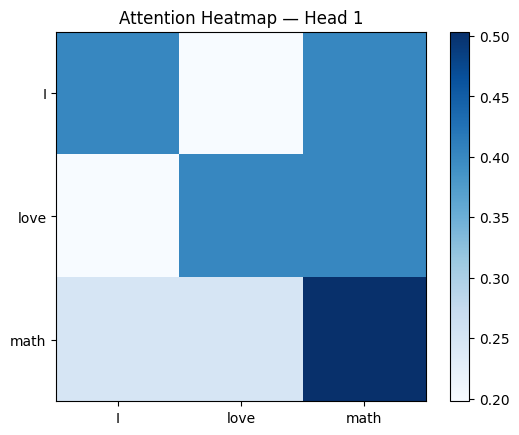

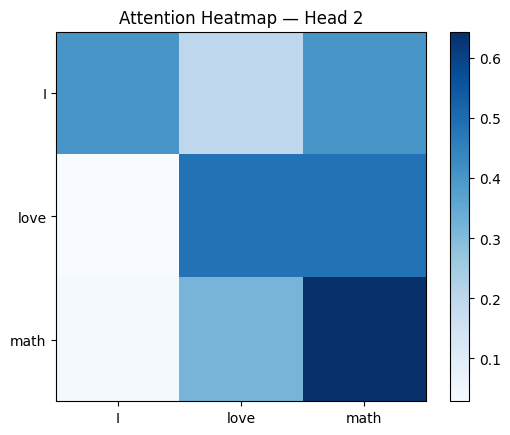

In [39]:
for i, A_h in enumerate([A1, A2], start=1):
    plt.figure()
    plt.imshow(A_h, cmap="Blues")
    plt.xticks(range(len(tokens)), tokens)
    plt.yticks(range(len(tokens)), tokens)
    plt.title(f"Attention Heatmap — Head {i}")
    plt.colorbar()
    plt.show()
